In [1]:
#1. What is a Decision Tree, and how does it work?
#A Decision Tree is a flowchart-like structure used for classification and regression. 
#It splits data into branches based on feature values using decision rules until it reaches a prediction at the leaf node. 
#It works by recursively partitioning the dataset into subsets that are more homogeneous with respect to the target variable.

In [ ]:
#2. What are impurity measures in Decision Trees?
#Impurity measures quantify the disorder or uncertainty in a dataset. Common measures include:
    #Gini Impurity
    #Entropy (used in Information Gain)
    #Classification Error

In [ ]:
#3. What is the mathematical formula for Gini Impurity?

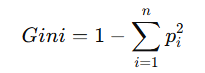

In [ ]:
#Where p𝑖 is the probability of 𝑖 class in the node.

In [ ]:
#4. What is the mathematical formula for Entropy?

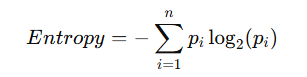

In [ ]:
#Where p𝑖 is the proportion of 𝑖 class in the node.

In [ ]:
#5. What is Information Gain, and how is it used in Decision Trees?
#Information Gain measures the reduction in entropy after a dataset is split on an attribute. 
#It helps select the feature that offers the most "information" when making a decision:

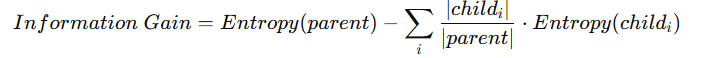

In [ ]:
#6. What is the difference between Gini Impurity and Entropy?
#(1)Gini is computationally faster and measures impurity.
#(2)Entropy is based on information theory and measures uncertainty.
#Both are used to decide the best feature split, but may lead to slightly different trees.

In [ ]:
#7. What is the mathematical explanation behind Decision Trees?
#Decision Trees use recursive binary splitting. At each node, the algorithm:
    #(1)Computes an impurity measure (like Gini or Entropy) for all features.
    #(2)Selects the feature and threshold that minimizes the impurity after the split.
    #(3)Repeats this process until a stopping condition is met (e.g., max depth, no gain).

In [ ]:
#8. What is Pre-Pruning in Decision Trees?
#Pre-Pruning halts the tree growth early during training by using criteria such as:
    #Maximum depth
    #Minimum number of samples at a node
    #Minimum impurity decrease
    #This avoids overfitting from the start.

In [ ]:
#9. What is Post-Pruning in Decision Trees?
#Post-Pruning grows the full tree first and then removes branches that provide little power, using a validation set or cost-complexity pruning.
#This helps improve generalization.

In [ ]:
#10. What is the difference between Pre-Pruning and Post-Pruning?
#(1)Pre-Pruning: Stops tree growth early, before reaching pure leaf nodes.
#(2)Post-Pruning: Builds the full tree and then simplifies it by removing unhelpful splits.

In [ ]:
#11. What is a Decision Tree Regressor?
#A Decision Tree Regressor predicts continuous values instead of categories. It splits data to minimize variance within subsets rather than impurity.

In [ ]:
#12. What are the advantages and disadvantages of Decision Trees?
#Advantages:
    #Easy to interpret and visualize
    #Handles both numerical and categorical data
    #Requires little data preprocessing
#Disadvantages:
    #Prone to overfitting
    #Unstable with small data changes
    #Biased toward features with more levels

In [ ]:
#13. How does a Decision Tree handle missing values?
#Methods include:
    #Assigning the most frequent value
    #Using surrogate splits (alternative features)
    #Imputation before training

In [ ]:
#14. How does a Decision Tree handle categorical features?
#Converts categories into binary splits (e.g., one-vs-rest)
#Can use one-hot encoding
#Some implementations handle them natively by evaluating the best category groupings

In [ ]:
#15. What are some real-world applications of Decision Trees?
#Medical diagnosis (e.g., predicting diseases)
#Credit risk analysis
#Customer segmentation
#Fraud detection
#Manufacturing quality control

In [27]:
#16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 1.0


In [33]:
#17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances.

model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)
print("Feature importances:", model.feature_importances_)


Feature importances: [0.01906318 0.01906318 0.0492455  0.91262813]


In [35]:
#18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy.

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 0.9777777777777777


In [37]:
#19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE).

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
print("MSE:", mean_squared_error(y_test, reg.predict(X_test)))


MSE: 0.5569148488535466


In [93]:
#20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz.

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the dataset
dataset = load_wine()
X = dataset.data
y = dataset.target

# Create a Decision Tree Classifier
model = DecisionTreeClassifier()

# Fit the model with the training data
model.fit(X, y)

# Visualize the Decision Tree
dot_data = tree.export_graphviz(model, out_file=None, 
                                 feature_names=dataset.feature_names,  
                                 class_names=dataset.target_names,  
                                 filled=True, rounded=True,  
                                 special_characters=True)  

# Create a Graphviz source object
graph = graphviz.Source(dot_data)  
graph.render("wine_decision_tree")  # Save the tree as a PDF file
graph.view()  # Open the PDF file


ModuleNotFoundError: No module named 'graphviz'

In [91]:
#21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree.

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the dataset
dataset = load_wine()
X = dataset.data
y = dataset.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Create a fully grown Decision Tree Classifier
full_tree_model = DecisionTreeClassifier()

# Fit the fully grown model with training data
full_tree_model.fit(X_train, y_train)

# Make predictions on the test set with the fully grown model
full_tree_predictions = full_tree_model.predict(X_test)

# Evaluate the fully grown model
full_tree_accuracy = accuracy_score(y_test, full_tree_predictions)
print(f"Fully Grown Decision Tree Accuracy: {full_tree_accuracy * 100:.2f}%\n")
print(f"Fully Grown Classification Report:\n{classification_report(y_test, full_tree_predictions)}")

# Create a Decision Tree Classifier with a maximum depth of 3
max_depth_model = DecisionTreeClassifier(max_depth=3)

# Fit the max depth model with training data
max_depth_model.fit(X_train, y_train)

# Make predictions on the test set with the max depth model
max_depth_predictions = max_depth_model.predict(X_test)

# Evaluate the max depth model
max_depth_accuracy = accuracy_score(y_test, max_depth_predictions)
print(f"Decision Tree (max_depth=3) Accuracy: {max_depth_accuracy * 100:.2f}%\n")
print(f"Max Depth Classification Report:\n{classification_report(y_test, max_depth_predictions)}")


Fully Grown Decision Tree Accuracy: 88.89%

Fully Grown Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4

    accuracy                           0.89        18
   macro avg       0.91      0.87      0.88        18
weighted avg       0.90      0.89      0.89        18

Decision Tree (max_depth=3) Accuracy: 88.89%

Max Depth Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.78      1.00      0.88         7
           2       1.00      0.75      0.86         4

    accuracy                           0.89        18
   macro avg       0.93      0.87      0.89        18
weighted avg       0.91      0.89      0.89        18



In [89]:
#22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree.

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the dataset
dataset = load_wine()
X = dataset.data
y = dataset.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Create a default Decision Tree Classifier
default_model = DecisionTreeClassifier()

# Fit the default model with training data
default_model.fit(X_train, y_train)

# Make predictions on the test set with the default model
default_predictions = default_model.predict(X_test)

# Evaluate the default model
default_accuracy = accuracy_score(y_test, default_predictions)
print(f"Default Decision Tree Accuracy: {default_accuracy * 100:.2f}%\n")
print(f"Default Classification Report:\n{classification_report(y_test, default_predictions)}")

# Create a Decision Tree Classifier with min_samples_split=5
custom_model = DecisionTreeClassifier(min_samples_split=5)

# Fit the custom model with training data
custom_model.fit(X_train, y_train)

# Make predictions on the test set with the custom model
custom_predictions = custom_model.predict(X_test)

# Evaluate the custom model
custom_accuracy = accuracy_score(y_test, custom_predictions)
print(f"Custom Decision Tree (min_samples_split=5) Accuracy: {custom_accuracy * 100:.2f}%\n")
print(f"Custom Classification Report:\n{classification_report(y_test, custom_predictions)}")


Default Decision Tree Accuracy: 88.89%

Default Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4

    accuracy                           0.89        18
   macro avg       0.91      0.87      0.88        18
weighted avg       0.90      0.89      0.89        18

Custom Decision Tree (min_samples_split=5) Accuracy: 88.89%

Custom Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4

    accuracy                           0.89        18
   macro avg       0.91      0.87      0.88        18
weighted avg       0.90      0.89      0.89        18



In [49]:
#23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y)
model.fit(X_train_s, y_train)
print("Scaled accuracy:", accuracy_score(y_test, model.predict(X_test_s)))


Scaled accuracy: 0.9473684210526315


In [87]:
#24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification.

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the dataset
dataset = load_wine()
X = dataset.data
y = dataset.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Create the Decision Tree model with One-vs-Rest strategy
model = OneVsRestClassifier(DecisionTreeClassifier())

# Fit the model with training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
print(f"Test Set Accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%\n")
print(f"Classification Report:\n{classification_report(y_test, predictions)}")


Test Set Accuracy: 88.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4

    accuracy                           0.89        18
   macro avg       0.91      0.87      0.88        18
weighted avg       0.90      0.89      0.89        18



In [53]:
#25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores.

for name, score in zip(load_iris().feature_names, model.feature_importances_):
    print(f"{name}: {score}")


sepal length (cm): 0.04945530703368373
sepal width (cm): 0.0
petal length (cm): 0.6611153510691766
petal width (cm): 0.28942934189713965


In [85]:
#26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor with max_depth=5
restricted_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
restricted_tree.fit(X_train, y_train)

# Train an unrestricted Decision Tree Regressor
unrestricted_tree = DecisionTreeRegressor(random_state=42)
unrestricted_tree.fit(X_train, y_train)

# Make predictions
y_pred_restricted = restricted_tree.predict(X_test)
y_pred_unrestricted = unrestricted_tree.predict(X_test)

# Evaluate performance
mae_restricted = mean_absolute_error(y_test, y_pred_restricted)
mae_unrestricted = mean_absolute_error(y_test, y_pred_unrestricted)

r2_restricted = r2_score(y_test, y_pred_restricted)
r2_unrestricted = r2_score(y_test, y_pred_unrestricted)

# Print the evaluation metrics
print(f'Restricted Tree (max_depth=5):')
print(f'Mean Absolute Error: {mae_restricted:.2f}')
print(f'R-squared: {r2_restricted:.2f}')

print(f'\nUnrestricted Tree:')
print(f'Mean Absolute Error: {mae_unrestricted:.2f}')
print(f'R-squared: {r2_unrestricted:.2f}')


Restricted Tree (max_depth=5):
Mean Absolute Error: 0.52
R-squared: 0.60

Unrestricted Tree:
Mean Absolute Error: 0.45
R-squared: 0.62


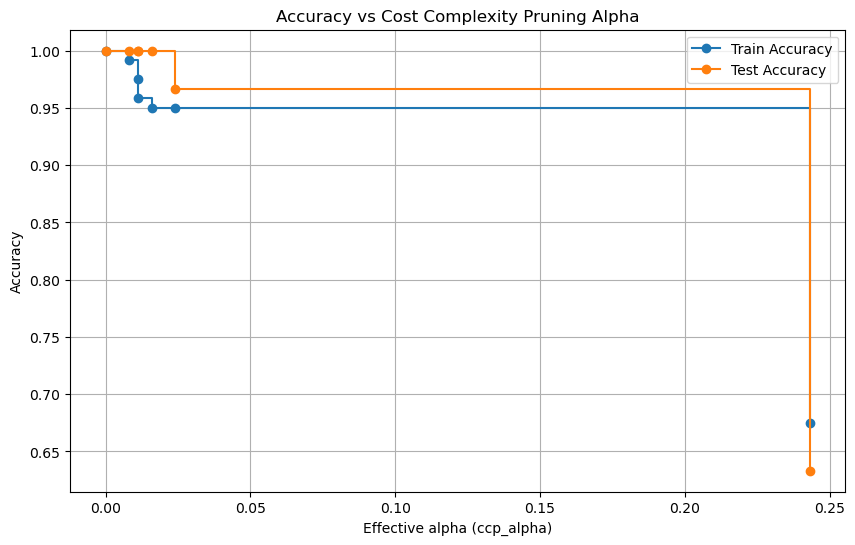

In [83]:
#27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a decision tree classifier without pruning (max complexity)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get the effective alphas and the total impurities at each step of pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Remove the maximum value of alpha (pruning all nodes)
ccp_alphas = ccp_alphas[:-1]

# List to store the decision trees for different alphas
clfs = []

# Train trees using different values of alpha for pruning
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Calculate accuracy of each tree on the test set
train_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# Plotting accuracy vs alpha values
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy', drawstyle="steps-post")
plt.xlabel('Effective alpha (ccp_alpha)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Cost Complexity Pruning Alpha')
plt.legend()
plt.grid(True)
plt.show()



In [81]:
#28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score.

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Print the classification report for detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))


Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Accuracy: 1.0


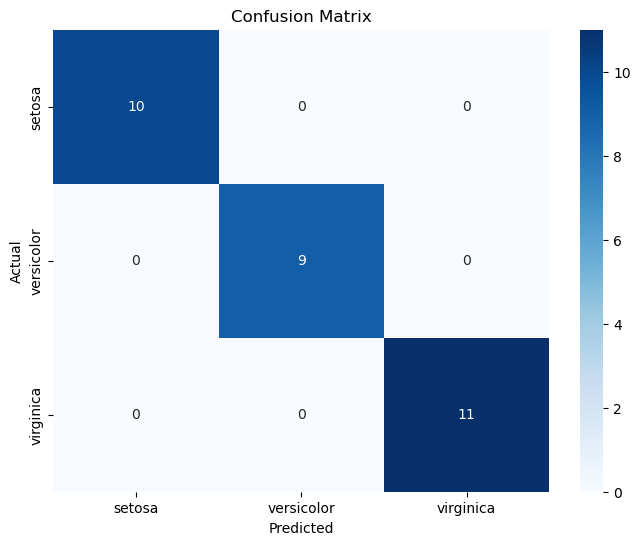

In [79]:
#29.  Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names, 
            yticklabels=data.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [77]:
#30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Create a hyperparameter grid
param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy (CV):", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best Accuracy (CV): 0.9416666666666668
Test Accuracy: 1.0
